In [1]:
# Euclidean Distance
from math import sqrt
plot1=[1,3]
plot2=[2,5]
euclidean_distance=sqrt((plot1[0]-plot2[0])**2+(plot1[1]-plot2[1])**2)
print(euclidean_distance)

2.23606797749979


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
import warnings
style.use('fivethirtyeight')

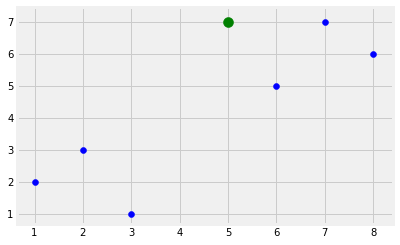

In [12]:
dataset={'k':[[1,2],[2,3],[3,1]],'r':[[6,5],[7,7],[8,6]]}
new_features=[5,7]
'''
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1],s=100,color='b')
'''
[[plt.scatter(ii[0],ii[1],color='b') for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1],s=100,c='g')
plt.show()

In [18]:
def knn(data,predict,k=3):
    if len(data)>=k:
        warnings.warn('K is set to a value less than total voting groups')
    distances=[]

    for group in data:
        for features in data[group]:
        # low efficiency,only deal with 2 features
        #euclidean_distance=sqrt((feature[0]-predict[0])**2+(feature[1]-predict[1])**2)
        # faster way:
            euclidean_distance=np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
        votes=[i[1] for i in sorted(distances)[:k]] # 选出最近的k个
        vote_result=Counter(votes).most_common(1)[0][0]
        #most_common gives an array of list, the first[0] gives us the list,the second[0] tells you which is the most popular
    return vote_result

In [19]:
result=knn(dataset,new_features,3)
print(result)

r


In [22]:
import random
import pandas as pd
df=pd.read_csv('breast-cancer-wisconsin.data',header = None,index_col=False,
               names=['id','clump_thickness','unif_cell_size','unif_cell_shape','marg_adhesion',
                      'single_epith_cell_size','bare_nuclei','bland_chrom','norm_nucleoli',
                     'mitoses','class'])
df.replace('?',-99999,inplace=True)
df.drop(['id'],1,inplace=True)
full_data=df.astype(float).values.tolist()
print(full_data[:5])

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0], [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0], [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0], [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0], [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0]]


In [23]:
#shuffle data
random.shuffle(full_data)
print(full_data[0:5])

[[2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0], [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0], [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0], [3.0, 1.0, 1.0, 3.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0]]


In [24]:
test_size=0.2
train_set={2:[],4:[]}
test_set={2:[],4:[]}
train_data=full_data[: -int(test_size*len(full_data))]
test_data=full_data[-int(test_size*len(full_data)):]

for i in train_data:
    #[i[-1]] points to the class
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    #[i[-1]] points to the class
    test_set[i[-1]].append(i[:-1])


In [25]:
correct=0
total=0
for group in test_set:
    for data in test_set[group]:
        vote=knn(train_set,data,k=5)
        if group==vote:
            correct+=1
        total+=1
        

In [26]:
print(correct/total)

0.9784172661870504


In [29]:
# if we increase k, will the accuracy increase? not necessary
correct=0
total=0
for group in test_set:
    for data in test_set[group]:
        vote=knn(train_set,data,k=25)
        if group==vote:
            correct+=1
        total+=1
print(correct/total)     

0.9568345323741008
